In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go
import pandas_profiling

In [155]:
df = pd.read_csv('Resources\WorldHappiness2018_Data.csv')
df = df.replace(np.nan, 0)

In [156]:
df.head(5)

,Rank,Country,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.988
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.723
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.779
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.564
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.675


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
Rank                            156 non-null int64
Country                         156 non-null object
Score                           156 non-null float64
GDP_Per_Capita                  156 non-null float64
Social_Support                  156 non-null float64
Healthy_Life_Expectancy         156 non-null float64
Freedom_To_Make_Life_Choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions_Of_Corruption       156 non-null float64
Residual                        156 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.3+ KB


In [147]:
#df.profile_report()

#df.profile_report(style={'full_width':True})
#profile = df.profile_report()
#rejected_variables = profile.get_rejected_variables(threshold=0.9)
#rejected_variables

In [158]:
df.shape

(156, 10)

In [159]:
df.columns

Index(['Rank', 'Country', 'Score', 'GDP_Per_Capita', 'Social_Support',
       'Healthy_Life_Expectancy', 'Freedom_To_Make_Life_Choices', 'Generosity',
       'Perceptions_Of_Corruption', 'Residual'],
      dtype='object')

In [160]:
df.groupby('Country')['Score', 'GDP_Per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 
                      'Freedom_To_Make_Life_Choices', 'Generosity', 'Perceptions_Of_Corruption', 'Residual'].mean().sort_values(by='Score', ascending=False)

,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Residual
Country,,,,,,,,
Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.988
Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.723
Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.779
Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.564
Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.675
Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295,2.743
Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291,2.596
New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389,2.545
Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383,2.601


In [161]:
X = df.drop(['Score', 'Country', 'GDP_Per_Capita', 'Social_Support',
       'Healthy_Life_Expectancy', 'Freedom_To_Make_Life_Choices', 'Generosity',
       'Perceptions_Of_Corruption', 'Residual'], axis=1)
y = df['Score']
print(X.shape, y.shape)

(156, 1) (156,)


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Standardized features\n')
print(str(X_train[:4]))

Standardized features

[[-1.08205047]
 [ 0.88576768]
 [ 0.86414331]
 [-0.77930922]]


Linear regression is a common Statistical Data Analysis technique.  It is used to determine the extent to which there is a linear relationship between a dependent variable and one or more independent variables.

In simple linear regression a single independent variable is used to predict the value of a dependent variable.

Simple linear regression is similar to correlation in that the purpose is to measure to what extent there is a linear relationship between two variables. The major difference between the two is that correlation makes no distinction between independent and dependent variables while linear regression does.

In [164]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [165]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_lm['Diff'] = y_test - y_pred
result_lm.to_csv('Output/LinearRegHappynessPred.csv')
result_lm.head()

,Actual,Predict,Diff
96,5.082,4.901391,0.180609
69,5.566,5.581407,-0.015407
82,5.302,5.253992,0.048008
76,5.410,5.405106,0.004894
114,4.500,4.448047,0.051953


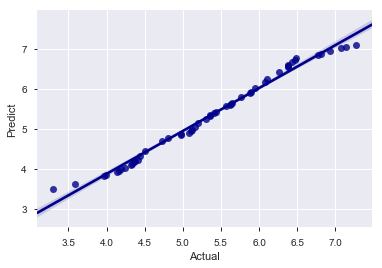

In [181]:
sns.regplot(x='Actual',y='Predict',data=result_lm, color="darkblue")
plt.savefig("Images/LinearRegHappynessPred_Act.png")

In [167]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11539447675790647
MSE: 0.019683823443238754
RMSE: 0.14029905004396415


Random forest algorithm can be used for both classifications and regression task.
It provides higher accuracy.
Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.
If there are more trees, it won’t allow overfitting trees in the model.
It has the power to handle a large data set with higher dimensionality

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [169]:
result_rf = pd.DataFrame({
    'Actual': y_test,
    'Predict':y_pred
})
result_rf['Diff'] = y_test - y_pred
result_lm.to_csv('Output/RandomForestRegHappynessPred.csv')
result_rf.head()

,Actual,Predict,Diff
96,5.082,5.0275,0.0545
69,5.566,5.5098,0.0562
82,5.302,5.3091,-0.0071
76,5.410,5.4224,-0.0124
114,4.500,4.5326,-0.0326


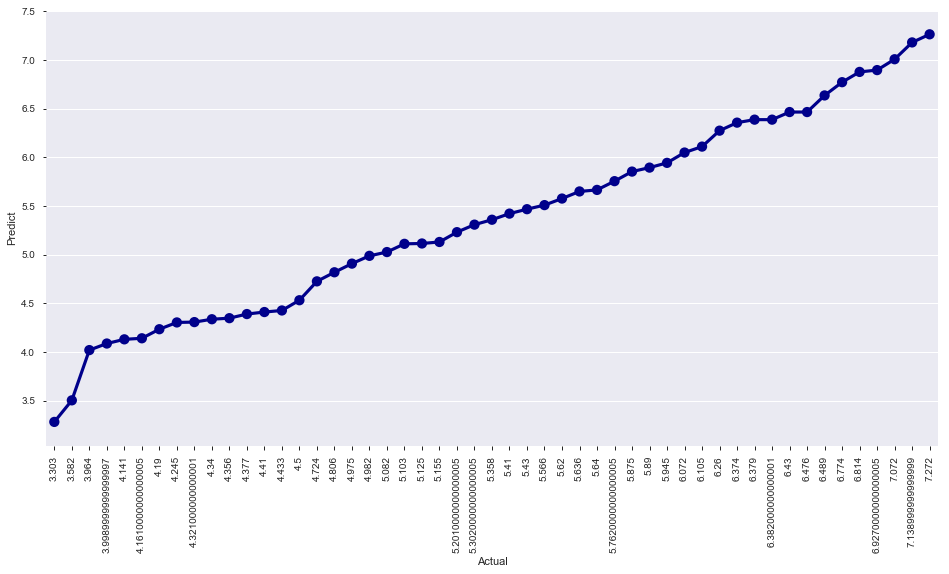

In [179]:
plt.figure (figsize = (16, 8))
sns.pointplot(x='Actual', y='Predict', data=result_rf, dodge = True, color="darkblue")
plt.xticks(rotation = 90)
plt.savefig("Images/RandomForestRegHappynessPred_Act.png")
plt.show()